In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ML

In [2]:
df = pd.read_csv("lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.shape

(309, 16)

In [4]:
df.duplicated().sum()

np.int64(33)

In [5]:
df=df.drop_duplicates()

In [6]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [9]:
numerical_cols=df.select_dtypes(include=['float64','int64']).columns

In [10]:
numerical_cols=numerical_cols[:-1]

In [11]:
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [12]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2,YES
1,M,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2,YES
2,F,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2,NO
3,M,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,NO
4,F,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,0.575758,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1,YES
280,F,0.575758,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,NO
281,M,0.515152,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,NO
282,M,0.378788,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,NO


In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [14]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2,1
1,1,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2,1
2,0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2,0
3,1,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,0
4,0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0.575758,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1,1
280,0,0.575758,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
281,1,0.515152,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,0
282,1,0.378788,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0


In [15]:
df.shape

(276, 16)

In [16]:
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
#accuracy

print(model.score(X_test, y_test))

0.9009009009009009


In [ ]:
accuracy_NB=accuracy_score(y_test,y_pred)
print(accuracy_NB)

0.9009009009009009


In [ ]:
#Decision tree

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model1.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
accuracy_DT=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.9107142857142857


In [ ]:
#Random Forest

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2=RandomForestClassifier()

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model2.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_RF=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.9107142857142857


In [ ]:
#SVM

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3=SVC()

In [ ]:
model3.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model3.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_SVM=accuracy_score(y_test,y_pred)
print(accuracy_SVM)

0.8214285714285714


In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=model4.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.9464285714285714


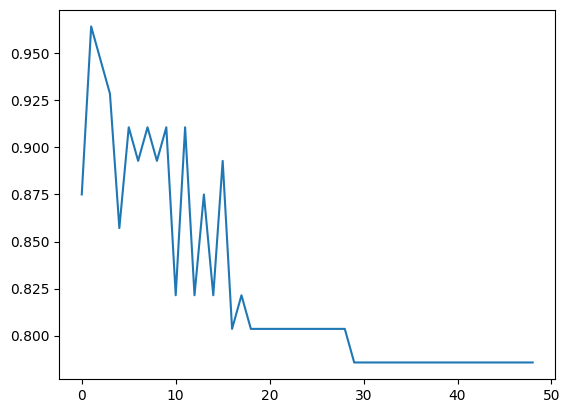

In [ ]:
acc=[]
for i in range(1,50):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
plt.plot(acc)

In [ ]:
acc[3]

0.9285714285714286

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
accuracy_KNN=accuracy_score(y_test,y_pred)

In [ ]:
#Logistic Resgression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model5=LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model5.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model5.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_LR=accuracy_score(y_test,y_pred)
print(accuracy_LR)

0.891566265060241


In [ ]:
#plot

In [ ]:
y_plot=[accuracy_NB,accuracy_DT,accuracy_RF,accuracy_SVM,accuracy_KNN,accuracy_LR]
X_plot=['NB','DT','RF','SVM','KNN','LR']


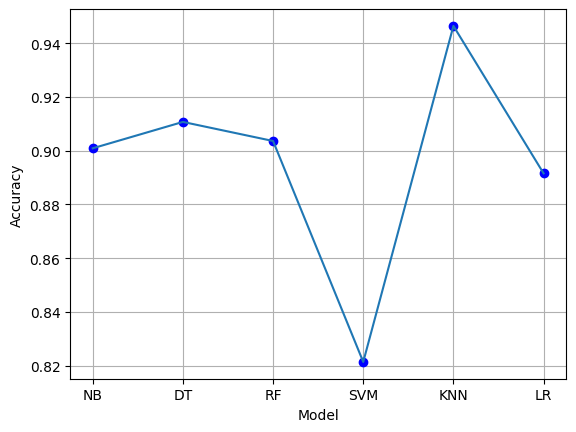

In [ ]:
plt.plot(X_plot, y_plot, 'o', color='blue')
plt.plot(X_plot, y_plot)
plt.grid(True)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import pickle

In [ ]:
with open("NB_model","wb") as handler1:
    pickle.dump(model,handler1)


In [ ]:
with open("DT_model","wb") as handler2:
    pickle.dump(model1, handler2)

In [ ]:
with open("RF_model","wb") as handler3:
    pickle.dump(model2,handler3)

In [ ]:
with open("SVM_model","wb") as handler4:
    pickle.dump(model3,handler4)

In [ ]:
with open("KNN_model","wb") as handler5:
    pickle.dump(model4,handler5)

In [ ]:
with open("LR_model","wb") as handler6:
    pickle.dump(model5,handler6)

# DL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
dl_model = Sequential()
dl_model.add(Dense(500, input_dim=15, activation='relu'))
dl_model.add(Dense(100, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])

dl_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8666 - loss: 0.5176
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8620 - loss: 0.3478
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8791 - loss: 0.3089 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8460 - loss: 0.3277
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8407 - loss: 0.3075
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8396 - loss: 0.3000
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8610 - loss: 0.2339
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8969 - loss: 0.2128 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9021 - loss: 0.1984 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9141 - loss: 0.1926 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9332 - loss: 0.1509  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9535 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5) #converting into binary 1 and 0


cm = confusion_matrix(y_test,y_pred_dl)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_dl)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_dl)
print("Accuracy: ",acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Confusion Matrix: 
[[ 3 10]
 [ 0 70]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.88      1.00      0.93        70

    accuracy                           0.88        83
   macro avg       0.94      0.62      0.65        83
weighted avg       0.89      0.88      0.85        83

Accuracy:  0.8795180722891566


In [ ]:
with open("DL_model","wb") as handler7:
    pickle.dump(dl_model,handler7)

# QML

In [17]:
!pip install qiskit==1.4.2
!pip install qiskit-machine-learning
!pip install qiskit-aer
!pip install qiskit-algorithms
from IPython import display
display.clear_output()

In [18]:
!pip list | grep qiskit

qiskit                                1.4.2
qiskit-aer                            0.17.0
qiskit-algorithms                     0.3.1
qiskit-machine-learning               0.8.2


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.result import QuasiDistribution
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
def qiskit_qml_predict(X_data):
    preds = []
    sampler = Sampler()

    for x in X_data.values: # Iterate through the numerical values of X_data
        qc = QuantumCircuit(8)
        for i in range(8):
            qc.ry(float(x[i]), i) # Convert x[i] to float explicitly

        for i in range(7):
            qc.cx(i, i + 1)

        qc.measure_all()

        result = sampler.run([qc]).result()
        output: QuasiDistribution = result.quasi_dists[0]

        # Convert integer keys to bitstrings before counting '1's
        high_risk_prob = sum([v for k, v in output.items() if bin(k).count('1') >= 2])
        preds.append(1 if high_risk_prob > 0.4 else 0)

    return np.array(preds)

In [48]:
#runniing model
y_train_pred = qiskit_qml_predict(X_train)
y_test_pred = qiskit_qml_predict(X_test)

<ipython-input-47-3b911287e8f3>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [49]:
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Confusion Matrix:
[[  8  18]
 [ 14 180]]
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.36      0.31      0.33        26
           1       0.91      0.93      0.92       194

    accuracy                           0.85       220
   macro avg       0.64      0.62      0.63       220
weighted avg       0.84      0.85      0.85       220

Accuracy: 0.8545454545454545


In [50]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[ 5  7]
 [ 2 42]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.86      0.95      0.90        44

    accuracy                           0.84        56
   macro avg       0.79      0.69      0.71        56
weighted avg       0.83      0.84      0.82        56

Accuracy: 0.8392857142857143
